# Описание проекта

## Цель проекта
Провести детальный анализ вакансий на позицию «PR-менеджер», размещенных на платформе Hh.ru. Исследование направлено на изучение ключевых аспектов рынка труда в данной области, таких как география вакансий, уровень заработных плат, требования к кандидатам, опыт работы и предпочтительные графики занятости.

## Основные шаги
- Сбор данных:
  - Загрузка данных с платформы Hh.ru.
  - Подготовка данных для анализа: удаление дубликатов, обработка пропущенных значений, выделение структурированных данных из сложных форматов.

- Предобработка данных:
  - Анализ структуры данных: определение количества записей и столбцов, устранение пропусков, удаление нерелевантных столбцов.
  - Преобразование ключевых столбцов, таких как зарплата, опыт работы, график занятости, в удобный для анализа формат.

- Аналитический обзор:
  - Построение распределений зарплат (минимальных, максимальных и медианных значений).
  - Исследование взаимосвязи между зарплатами и другими характеристиками вакансий (опыт, занятость и пр.).
  - Географический анализ, включающий распределение вакансий по городам и средние зарплаты в ведущих регионах.
  - Изучение активности работодателей: определение компаний с наибольшим количеством вакансий.
  - Анализ требований к образованию и их связи с уровнем зарплат.

- Визуализация данных:
  - Построение графиков для визуального представления данных: гистограммы зарплат, столбчатые диаграммы по регионам, графики зависимости зарплат от опыта работы.

- Результат:

Проект позволит получить обобщенную и визуализированную информацию о рынке труда для PR-менеджеров, что может быть полезно для соискателей, работодателей и аналитиков в сфере HR.

**Описание полей в данных**
- `id` — идентификатор вакансии.
- `premium` — булевый флаг, указывает, является ли вакансия премиальной.
- `name` — название вакансии.
- `department` — информация о подразделении компании (если указано).
- `has_test` — булевый флаг, указывает, требуется ли тестовое задание.
- `response_letter_required` — булевый флаг, указывает, требуется ли сопроводительное письмо.
- `area` — информация о местоположении вакансии (id, название города, URL).
- `salary` — информация о зарплате (границы диапазона, валюта, возможность обсуждения).
- `type` — тип вакансии (например, "открытая").
- `address` — адрес, включая город, улицу, координаты (если указано).
- `response_url` — URL для отклика на вакансию.
- `sort_point_distance` — расстояние до определённой точки (например, заданного адреса, если применимо).
- `published_at` — дата и время публикации вакансии.
- `created_at` — дата и время создания вакансии.
- `archived` — булевый флаг, указывает, архивирована ли вакансия.
- `apply_alternate_url` — URL для отклика через альтернативные платформы.
- `insider_interview` — информация о внутреннем интервью (если доступно).
- `url` — URL вакансии на hh.ru.
- `alternate_url` — альтернативный URL вакансии.
- `relations` — отношения (связанные объекты, если применимо).
- `employer` — информация о работодателе (id, название, логотип, URL и пр.).
- `snippet` — краткое описание вакансии, включая обязанности и требования.
- `contacts` — контактная информация работодателя (если доступно).
- `schedule` — информация о графике работы (id и название).
- `working_days` — дни недели, когда требуется работа (если указано).
- `working_time_intervals` — интервалы рабочего времени (если указано).
- `working_time_modes` — режимы рабочего времени (если указано).
- `accept_temporary` — булевый флаг, указывает, подходит ли вакансия для временной работы.
- `professional_roles` — список профессиональных ролей (id и название).
- `accept_incomplete_resumes` — булевый флаг, указывает, принимаются ли неполные резюме.
- `experience` — информация о требуемом опыте работы (id и описание).
- `employment` — информация о типе занятости (id и описание).
- `adv_response_url` — URL для отклика на рекламу вакансии.
- `is_adv_vacancy` — булевый флаг, указывает, является ли вакансия рекламной.
- `adv_context` — контекст рекламной вакансии (если применимо).
- `show_logo_in_search` — булевый флаг, указывает, показывается ли логотип в результатах поиска.
- `branding` — информация о брендинге (если доступно).

# Загрузка данных и подготовка их к анализу

In [ ]:
# Импорт библиотек
import pandas as pd
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка данных
try:
    # попытка прочитать файл из Drive Google
    path = '/content/drive/MyDrive/Colab Notebooks/Работа/Dataset/'
    df_pr = pd.read_csv(path + 'data_pr.csv')
except FileNotFoundError:
    # если файлы не найдены, вывод сообщения об ошибке
    print(f"Ошибка чтения файлов")

In [ ]:
# Функция для обзора данных
def data_review(data):
    display(data.head())
    print('------------------------------------------------------------------------------------------------')
    print(data.info())
    print('------------------------------------------------------------------------------------------------')
    print(data.isnull().sum())
    print('------------------------------------------------------------------------------------------------')
    print(data.duplicated().sum())

## Изучение данных
Изучение данных датафрейма с вакансиями 'PR менеджер'.

In [ ]:
# Обзор данных в датафрейме 'data_pr'
data_review(df_pr)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,show_logo_in_search,branding
0,109661245,False,Менеджер по культурным проектам,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 60000, 'to': 100000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",NaN,...,True,"[{'id': '1', 'name': 'Event-менеджер'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'part', 'name': 'Частичная занятость'}",NaN,False,NaN,NaN,NaN
1,109136951,False,Бренд-менеджер / Бренд-продюсер в SETTERS EDUC...,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,False,"[{'id': '2', 'name': 'PR-менеджер'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN
2,108506995,False,Шеф-редактор (PR-менеджер),NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Лужники', ...",...,False,"[{'id': '2', 'name': 'PR-менеджер'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN
3,109144254,False,Специалист по связям с общественностью,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 85140, 'to': 85140, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кадашёвская набе...",...,False,"[{'id': '2', 'name': 'PR-менеджер'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN
4,109091066,False,Юрист / Руководитель юридического отдела,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 300000, 'to': 370000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",NaN,...,False,"[{'id': '166', 'name': 'Директор юридического ...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN,NaN


------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738 entries, 0 to 8737
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8738 non-null   int64  
 1   premium                    8738 non-null   bool   
 2   name                       8738 non-null   object 
 3   department                 353 non-null    object 
 4   has_test                   8738 non-null   bool   
 5   response_letter_required   8738 non-null   bool   
 6   area                       8738 non-null   object 
 7   salary                     5401 non-null   object 
 8   type                       8738 non-null   object 
 9   address                    6165 non-null   object 
 10  response_url               0 non-null      float64
 11  sort_point_distance        0 non-null      float64
 12  publish

1.   **Количество строк и столбцов**
  *   В датафрейме 8738 строк и 37 столбцов.

2.   **Пропуски**
*   Присутствует большое количество пропусков в столбцах:
  *   `department` (8385 пропусков)
  *   `salary` (3337 пропусков)
  *   `address` (2573 пропуска)
  *   `response_url`, `sort_point_distance`, `contacts`, `adv_response_url`, `adv_context` (все значения пропущены).
  *   `insider_interview`, `show_logo_in_search`, `branding` также имеют значительное количество пропусков.

3.   **Дубликаты**
  *   Найдено 2875 дубликатов.

## Обработка дубликатов

Удалим все дубликаты вакансий, за уникальность будем считать значение `id` — идентификатор вакансии.

In [ ]:
# Количество вакансий до удаления дубликатов
vacancies_before = df_pr.shape[0]

# Удаляем дубликаты по столбцу 'id'
df_pr = df_pr.drop_duplicates(subset='id')

# Количество вакансий после удаления дубликатов
vacancies_after = df_pr.shape[0]

vacancies_before, vacancies_after

(8738, 2246)

Количество вакансий до удаления дубликатов: **8738**

Количество вакансий после удаления дубликатов: **2246**

## Обработка пропусков и оптимизация данных

Множество пропусков было обнаружено в столбце `salary`. Для удобства и дальнейшего анализа создадим новые столбцы `salary_from` и `salary_to`, поместим в них значения зарплат 'от' и 'до' (границы диапазона) из столбца `salary`, а пропущенные значения в этих столбцах заменим медианой зарплат по другим вакансиям с похожими условиями (в зависимости от `experience` и `employment`).

*   `salary_from` - нижняя граница предлагаемой заработной платы
*   `salary_to` - верхняя граница предлагаемой заработной платы



In [ ]:
# Преобразование данных в столбце 'salary' для создания новых столбцов
def extract_salary_bounds(salary):
    if pd.isna(salary):
        return None, None
    try:
        salary_dict = ast.literal_eval(salary)
        return salary_dict.get('from'), salary_dict.get('to')
    except (ValueError, SyntaxError):
        return None, None

# Применяем функцию для создания новых столбцов
df_pr[['salary_from', 'salary_to']] = df_pr['salary'].apply(
    lambda x: pd.Series(extract_salary_bounds(x))
)

# Просмотр первых строк с новыми столбцами
df_pr[['salary', 'salary_from', 'salary_to']].head(10)

,salary,salary_from,salary_to
0,"{'from': 60000, 'to': 100000, 'currency': 'RUR...",60000.0,100000.0
1,NaN,NaN,NaN
2,"{'from': 200000, 'to': 200000, 'currency': 'RU...",200000.0,200000.0
3,"{'from': 85140, 'to': 85140, 'currency': 'RUR'...",85140.0,85140.0
4,"{'from': 300000, 'to': 370000, 'currency': 'RU...",300000.0,370000.0
5,"{'from': 90000, 'to': 110000, 'currency': 'RUR...",90000.0,110000.0
6,NaN,NaN,NaN
7,"{'from': 200000, 'to': 400000, 'currency': 'RU...",200000.0,400000.0
8,"{'from': 50000, 'to': 90000, 'currency': 'RUR'...",50000.0,90000.0
9,"{'from': 40000, 'to': 45000, 'currency': 'RUR'...",40000.0,45000.0


In [ ]:
# Группируем данные по 'experience' и 'employment', вычисляем медианы
salary_medians = df_pr.groupby(['experience', 'employment'])[['salary_from', 'salary_to']].median()

# Функция для заполнения пропущенных значений медианой
def fill_missing_salaries(df, salary_medians):
    for index, row in df.iterrows():
        experience = row['experience']
        employment = row['employment']
        # Если salary_from пустая, заполняем её медианным значением
        if pd.isnull(row['salary_from']):
            median_salary_from = salary_medians.loc[(experience, employment), 'salary_from']
            df.at[index, 'salary_from'] = median_salary_from
        # Если salary_to пустая, заполняем её медианным значением
        if pd.isnull(row['salary_to']):
            median_salary_to = salary_medians.loc[(experience, employment), 'salary_to']
            df.at[index, 'salary_to'] = median_salary_to
    return df

# Заполняем пропущенные значения
df_pr = fill_missing_salaries(df_pr.copy(), salary_medians)

# Проверяем, остались ли пропуски в данных
missing_values = df_pr[['salary_from', 'salary_to']].isnull().sum()
missing_values

,0
salary_from,2
salary_to,2


In [ ]:
# Создание нового столбца со средним значением диапазона зарплат
df_pr['salary_mean'] = df_pr[['salary_from', 'salary_to']].mean(axis=1)

# Проверка результата
df_pr[['salary_from', 'salary_to', 'salary_mean']].head()

,salary_from,salary_to,salary_mean
0,60000.0,100000.0,80000.0
1,70000.0,88622.0,79311.0
2,200000.0,200000.0,200000.0
3,85140.0,85140.0,85140.0
4,300000.0,370000.0,335000.0


In [ ]:
# Выявление выбросов с использованием метода межквартильного размаха (IQR)
q1 = df_pr['salary_mean'].quantile(0.25)
q3 = df_pr['salary_mean'].quantile(0.75)
iqr = q3 - q1

# Границы для определения выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Выборка выбросов
outliers = df_pr[(df_pr['salary_mean'] < lower_bound) | (df_pr['salary_mean'] > upper_bound)]

# Количество выбросов и их границы
outlier_count = outliers.shape[0]
lower_bound, upper_bound, outlier_count

(25777.5, 168533.5, 85)

In [ ]:
# Вычисляем медиану зарплат для каждой группы 'experience' и 'employment'
salary_group_medians = df_pr.groupby(['experience', 'employment'])['salary_mean'].median()

# Функция для замены выбросов медианой
def replace_outliers_with_median(row, lower_bound, upper_bound, salary_group_medians):
    if row['salary_mean'] < lower_bound or row['salary_mean'] > upper_bound:
        group_key = (row['experience'], row['employment'])
        return salary_group_medians.get(group_key, row['salary_mean'])
    return row['salary_mean']

# Применяем функцию к столбцу 'salary_mean'
df_pr['salary_mean'] = df_pr.apply(
    lambda row: replace_outliers_with_median(row, lower_bound, upper_bound, salary_group_medians), axis=1
)

# Проверяем, остались ли выбросы
outliers_after = df_pr[(df_pr['salary_mean'] < lower_bound) | (df_pr['salary_mean'] > upper_bound)]
outliers_after.shape[0]

0

**Заполнение пропусков в зарплатах:**    
- Пропуски в столбцах `salary_from` и `salary_to` были заполнены медианными значениями по группам, основанным на опыте (`experience`) и типе занятости (`employment`).
- Оставшиеся единичные пропуски в этих столбцах были признаны несущественными для анализа.
- Все выбросы в столбце `salary_mean` были успешно заменены медианой зарплат в соответствующих группах `experience` и `employment`.

**Оптимизация:**
- Удалим оставшиеся столбцы, которые содержат множество пропусков, и те -  значения которых не повлияют на дальнейший анализ.

In [ ]:
# Удаление ненужных столбцов
columns_to_drop = [
    'department', 'address', 'response_url', 'sort_point_distance',
    'contacts', 'adv_response_url', 'adv_context', 'insider_interview',
    'show_logo_in_search', 'branding', 'premium', 'type',
    'accept_incomplete_resumes', 'is_adv_vacancy', 'salary', 'url',
    'published_at', 'archived', 'apply_alternate_url', 'alternate_url',
    'relations', 'working_days', 'working_time_intervals', 'working_time_modes'
]

df_pr = df_pr.drop(columns=columns_to_drop)

In [ ]:
# Обзор данных в датафрейме 'data_pr' после изменений
data_review(df_pr)

,id,name,has_test,response_letter_required,area,created_at,employer,snippet,schedule,accept_temporary,professional_roles,experience,employment,salary_from,salary_to,salary_mean
0,109661245,Менеджер по культурным проектам,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",2024-10-30T14:38:16+0300,"{'id': '11375920', 'name': 'Михайлова Елена Ал...",{'requirement': 'Опыт работы: приветствуется о...,"{'id': 'flexible', 'name': 'Гибкий график'}",True,"[{'id': '1', 'name': 'Event-менеджер'}]","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'part', 'name': 'Частичная занятость'}",60000.0,100000.0,80000.0
1,109136951,Бренд-менеджер / Бренд-продюсер в SETTERS EDUC...,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-10-23T12:32:02+0300,"{'id': '9408306', 'name': 'SETTERS EDUCATION',...",{'requirement': 'Опыт работы с медиа в роли <h...,"{'id': 'flexible', 'name': 'Гибкий график'}",False,"[{'id': '2', 'name': 'PR-менеджер'}]","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",70000.0,88622.0,79311.0
2,108506995,Шеф-редактор (PR-менеджер),False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-10-14T17:32:11+0300,"{'id': '591205', 'name': 'Лужники Олимпийский ...",{'requirement': 'Опыт работы в сфере от 3-х ле...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"[{'id': '2', 'name': 'PR-менеджер'}]","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",200000.0,200000.0,115000.0
3,109144254,Специалист по связям с общественностью,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-10-23T14:13:44+0300,"{'id': '2057439', 'name': 'Третьяковская галер...",{'requirement': 'В/о (профильное). Релевантный...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"[{'id': '2', 'name': 'PR-менеджер'}]","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",85140.0,85140.0,85140.0
4,109091066,Юрист / Руководитель юридического отдела,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2024-10-22T22:21:27+0300,"{'id': '10321220', 'name': 'Суханов Вячеслав А...",{'requirement': 'Релевантный опыт работы как C...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"[{'id': '166', 'name': 'Директор юридического ...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",300000.0,370000.0,115000.0


------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2246 entries, 0 to 8704
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2246 non-null   int64  
 1   name                      2246 non-null   object 
 2   has_test                  2246 non-null   bool   
 3   response_letter_required  2246 non-null   bool   
 4   area                      2246 non-null   object 
 5   created_at                2246 non-null   object 
 6   employer                  2246 non-null   object 
 7   snippet                   2246 non-null   object 
 8   schedule                  2246 non-null   object 
 9   accept_temporary          2246 non-null   bool   
 10  professional_roles        2246 non-null   object 
 11  experience                2246 non-null   object 
 12  employment                

Ненужные столбцы успешно удалены. Теперь в датафрейме остались следующие столбцы:

- `id` — идентификатор вакансии.
- `name` — название вакансии.
- `has_test` — наличие тестового задания.
- `response_letter_required` — требуется ли сопроводительное письмо.
- `area` — регион.
- `created_at` — дата создания вакансии.
- `employer` — работодатель.
- `snippet` — краткое описание вакансии.
- `schedule` — график работы.
- `accept_temporary` — возможность временной работы.
- `professional_roles` — профессиональная роль.
- `experience` — опыт работы.
- `employment` — тип занятости.
- `salary_from` — минимальная зарплата.
- `salary_to` — максимальная зарплата.

Для упрощения анализа извлечем и заменим содержимое столбца `area` на название города, соответствующее каждому значению.

In [ ]:
# Функция для извлечения названия города из значения в столбце 'area'
def extract_city(area):
    try:
        area_dict = ast.literal_eval(area)
        return area_dict.get('name')
    except (ValueError, SyntaxError, AttributeError):
        return None

# Применяем функцию к столбцу 'area'
df_pr['area'] = df_pr['area'].apply(extract_city)

# Проверяем изменения в столбце 'area'
df_pr['area'].head(10)

,area
0,Санкт-Петербург
1,Москва
2,Москва
3,Москва
4,Москва
5,Ростов-на-Дону
6,Москва
7,Москва
8,Санкт-Петербург
9,Нижний Новгород


По аналогии извлечем и заменим содержимое столбца `employer` на название работодателя, соответствующее каждому значению.

In [ ]:
# Функция для извлечения названия работодателя из значения в столбце 'employer'
def extract_employer_name(employer):
    try:
        employer_dict = ast.literal_eval(employer)
        return employer_dict.get('name')
    except (ValueError, SyntaxError, AttributeError):
        return None

# Применяем функцию к столбцу 'employer'
df_pr['employer'] = df_pr['employer'].apply(extract_employer_name)

# Проверяем изменения в столбце 'employer'
df_pr['employer'].head(10)

,employer
0,Михайлова Елена Алексеевна
1,SETTERS EDUCATION
2,Лужники Олимпийский комплекс
3,Третьяковская галерея
4,Суханов Вячеслав Андреевич
5,ОДА
6,PR Inc.
7,АнРуссТранс
8,PR-агентство ЗНАТЬ
9,Пригодич Антон Дмитриевич


Для анализа требований к образованию в вакансиях создадим новый столбец `education`. В этом столбце будем отмечать значение 'True', если в кратком описании вакансии (столбце `snippet`) упоминается слово "образование", и 'False' в противном случае.

In [ ]:
# Создание нового столбца 'education' на основе наличия слова "образование" или "образования" в столбце 'snippet'
df_pr['education'] = df_pr['snippet'].str.contains(r'\bобразовани[еия]\b', case=False, na=False)

# Проверяем изменения в новом столбце
df_pr[['snippet', 'education']].head(20)

,snippet,education
0,{'requirement': 'Опыт работы: приветствуется о...,False
1,{'requirement': 'Опыт работы с медиа в роли <h...,False
2,{'requirement': 'Опыт работы в сфере от 3-х ле...,False
3,{'requirement': 'В/о (профильное). Релевантный...,False
4,{'requirement': 'Релевантный опыт работы как C...,False
5,{'requirement': 'Организаторские навыки. Умени...,False
6,{'requirement': 'Высшее образование. Интеллект...,True
7,"{'requirement': 'Высшее образование (PR, Рекла...",True
8,{'requirement': 'Умеете оперативно искать инфо...,False
9,"{'requirement': 'У нас небольшой, дружный колл...",False


Для упрощения анализа извлечем и заменим содержимое столбца `schedule` на название графика работы, соответствующее каждому значению.

In [ ]:
# Функция для извлечения названия графика работы из значения в столбце 'schedule'
def extract_schedule_name(schedule):
    try:
        schedule_dict = ast.literal_eval(schedule)
        return schedule_dict.get('name')
    except (ValueError, SyntaxError, AttributeError):
        return None

# Применяем функцию к столбцу 'schedule'
df_pr['schedule'] = df_pr['schedule'].apply(extract_schedule_name)

# Проверяем изменения в столбце 'schedule'
df_pr['schedule'].head(10)

,schedule
0,Гибкий график
1,Гибкий график
2,Полный день
3,Полный день
4,Полный день
5,Полный день
6,Полный день
7,Полный день
8,Удаленная работа
9,Удаленная работа


Извлечем и заменим содержимое столбца `experience` на название опыта работы, соответствующее каждому значению.

In [ ]:
# Функция для извлечения названия опыта работы из значения в столбце 'experience'
def extract_experience_name(experience):
    try:
        experience_dict = ast.literal_eval(experience)
        return experience_dict.get('name')
    except (ValueError, SyntaxError, AttributeError):
        return None

# Применяем функцию к столбцу 'experience'
df_pr['experience'] = df_pr['experience'].apply(extract_experience_name)

# Проверяем изменения в столбце 'experience'
df_pr['experience'].head(10)

,experience
0,Нет опыта
1,От 1 года до 3 лет
2,От 3 до 6 лет
3,От 1 года до 3 лет
4,От 3 до 6 лет
5,От 1 года до 3 лет
6,Нет опыта
7,От 3 до 6 лет
8,От 3 до 6 лет
9,От 1 года до 3 лет


Извлечем и заменим содержимое столбца `employment` на название типа занятости, соответствующее каждому значению.

In [ ]:
# Функция для извлечения названия типа занятости из значения в столбце 'employment'
def extract_employment_name(employment):
    try:
        employment_dict = ast.literal_eval(employment)
        return employment_dict.get('name')
    except (ValueError, SyntaxError, AttributeError):
        return None

# Применяем функцию к столбцу 'employment'
df_pr['employment'] = df_pr['employment'].apply(extract_employment_name)

# Проверяем изменения в столбце 'employment'
df_pr['employment'].head(10)

,employment
0,Частичная занятость
1,Полная занятость
2,Полная занятость
3,Полная занятость
4,Полная занятость
5,Полная занятость
6,Полная занятость
7,Полная занятость
8,Полная занятость
9,Полная занятость


# Исследовательский анализ данных

## Анализ зарплат
Построим график распределение зарплат (среднего значения диапазона).

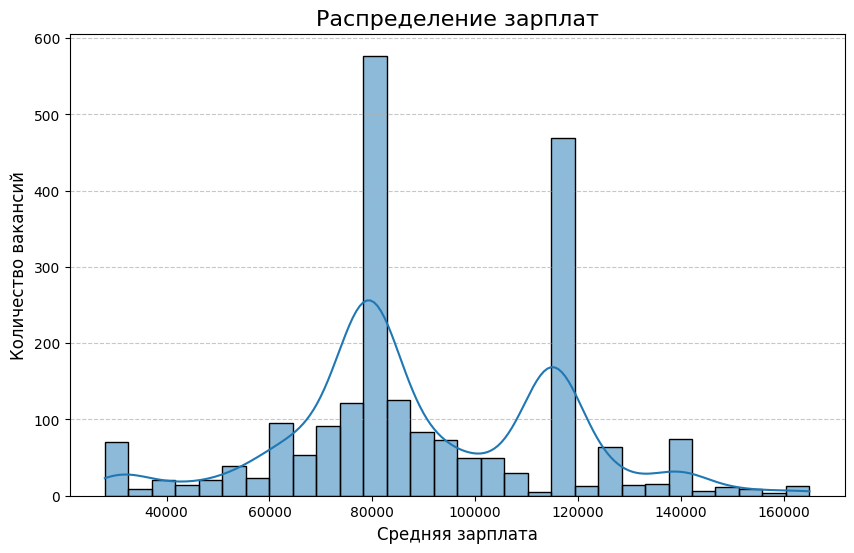

In [ ]:
# Визуализация распределения зарплат
plt.figure(figsize=(10, 6))
sns.histplot(df_pr['salary_mean'], bins=30, kde=True)
plt.title('Распределение зарплат', fontsize=16)
plt.xlabel('Средняя зарплата', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Основные статистические показатели для столбца salary_mean
salary_stats = df_pr['salary_mean'].describe()
salary_stats

,salary_mean
count,2244.000000
mean,90371.126560
std,26285.485407
min,28000.000000
25%,79311.000000
50%,80461.000000
75%,115000.000000
max,165000.000000


По результатам анализа распределения зарплат, основные значения находятся в диапазоне от 28000 до 165000 рублей, при этом пиковые значения встречаются около 80000 и 115000 рублей. Средняя зарплата составляет 90371 рубль.

Исследуем связь между зарплатой и другими параметрами, например, опытом работы (`experience`) и типом занятости (`employment`).

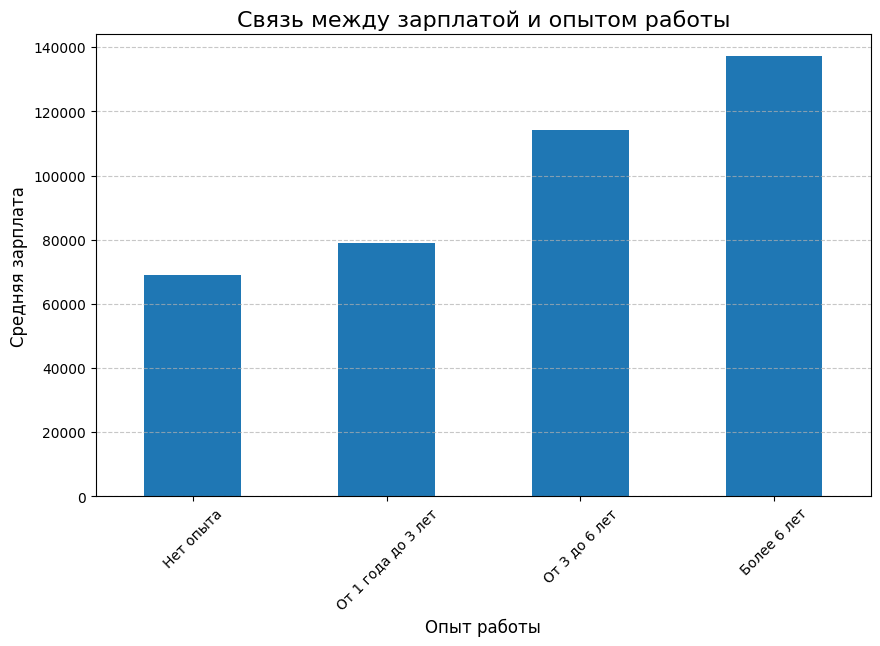

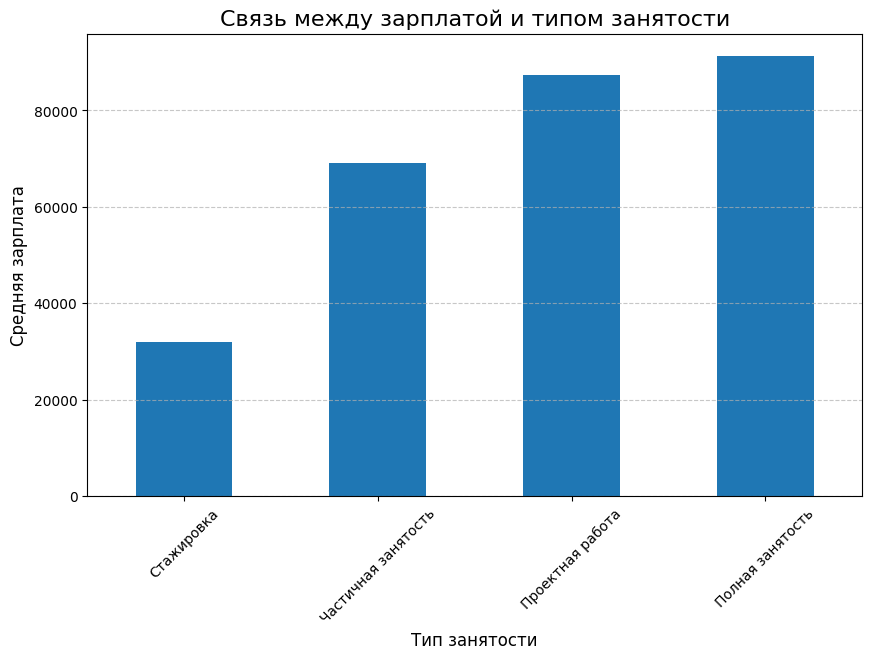

(experience
 Более 6 лет           137142.857143
 Нет опыта              68938.981043
 От 1 года до 3 лет     78883.669775
 От 3 до 6 лет         114324.158126
 Name: salary_mean, dtype: float64,
 employment
 Полная занятость       91250.467099
 Проектная работа       87222.222222
 Стажировка             32000.000000
 Частичная занятость    68976.056338
 Name: salary_mean, dtype: float64)

In [ ]:
# Исследование связи между средней зарплатой и опытом работы
experience_salary = df_pr.groupby('experience')['salary_mean'].mean()

# Исследование связи между средней зарплатой и типом занятости
employment_salary = df_pr.groupby('employment')['salary_mean'].mean()

# Визуализация связи с опытом работы
plt.figure(figsize=(10, 6))
experience_salary.sort_values().plot(kind='bar', rot=45)
plt.title('Связь между зарплатой и опытом работы', fontsize=16)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Визуализация связи с типом занятости
plt.figure(figsize=(10, 6))
employment_salary.sort_values().plot(kind='bar', rot=45)
plt.title('Связь между зарплатой и типом занятости', fontsize=16)
plt.xlabel('Тип занятости', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

experience_salary, employment_salary

Выявлена четкая связь между уровнем зарплаты, опытом работы и типом занятости.
- Зарплата значительно возрастает с увеличением опыта: минимальные значения характерны для тех, у кого нет опыта (около 68000 рублей), а максимальные — для специалистов с опытом более 6 лет (более 137000 рублей).
- По типу занятости самые высокие зарплаты наблюдаются при полной занятости (около 91000 рублей), тогда как стажировки предлагают наименьший уровень оплаты (около 32000 рублей).

## Анализ географии вакансий
Посчитаем количество вакансий по городам. Выявим города с наибольшим и наименьшим количеством вакансий.


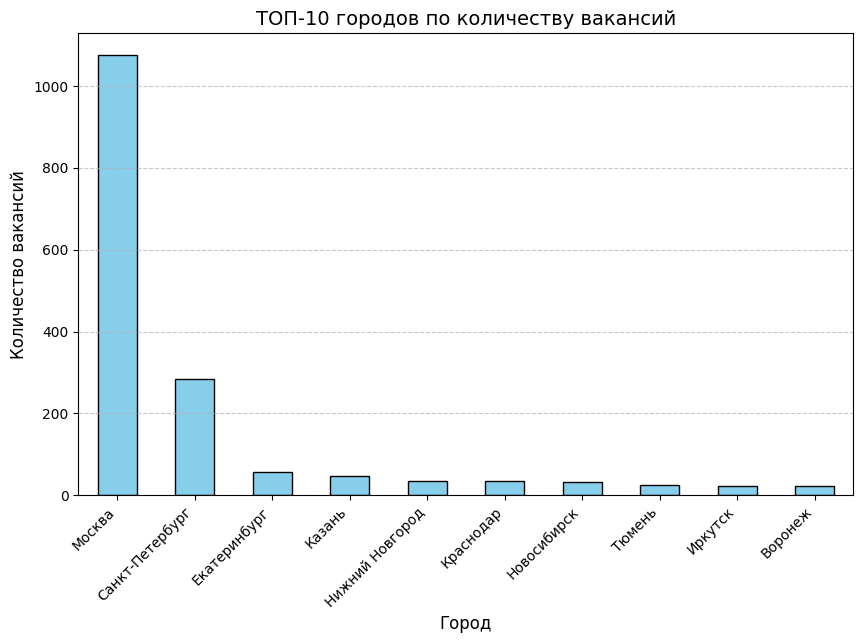

('Москва',
 'Курчатов',
 area
 Москва             1075
 Санкт-Петербург     284
 Екатеринбург         56
 Казань               48
 Нижний Новгород      36
 Краснодар            36
 Новосибирск          32
 Тюмень               25
 Иркутск              23
 Воронеж              23
 Name: count, dtype: int64)

In [ ]:
# Подсчет количества вакансий по городам
vacancies_by_city = df_pr['area'].value_counts()

# Определение городов с наибольшим и наименьшим количеством вакансий
most_vacancies_city = vacancies_by_city.idxmax()
least_vacancies_city = vacancies_by_city.idxmin()

# Визуализация количества вакансий по городам (топ-10 городов)
top_cities = vacancies_by_city.head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('ТОП-10 городов по количеству вакансий', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

most_vacancies_city, least_vacancies_city, top_cities

- Наибольшее количество вакансий размещено в Москве - это свидетельствует о высокой концентрации возможностей для PR-менеджеров в столице.
Санкт-Петербург занимает второе место с заметным отрывом от Москвы.
- Топ-10 городов демонстрируют существенное неравенство в распределении вакансий, где доминируют Москва и Санкт-Петербург, а остальные города имеют относительно меньший спрос.

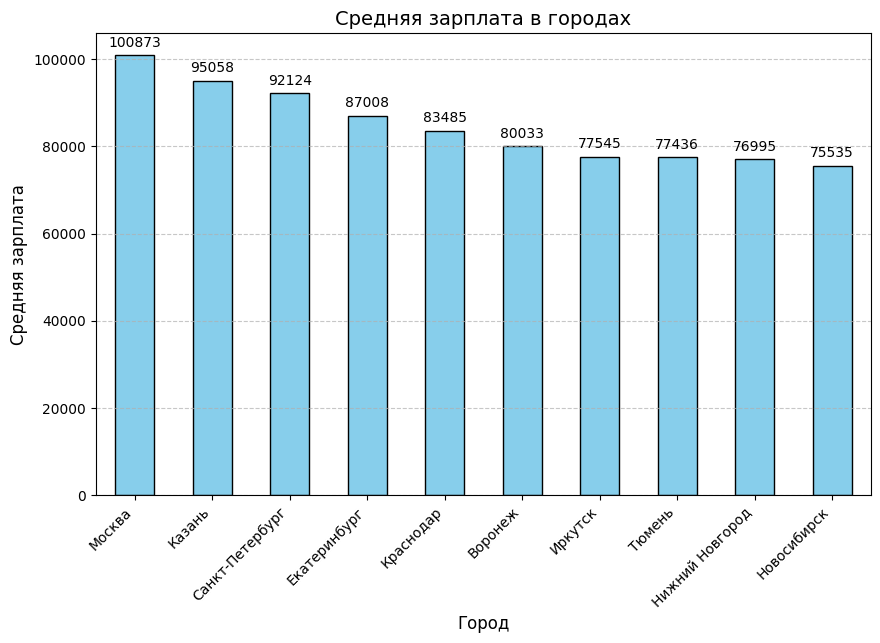

,salary_mean
area,
Москва,100872.769088
Казань,95058.187500
Санкт-Петербург,92124.285211
Екатеринбург,87007.785714
Краснодар,83485.000000
Воронеж,80032.913043
Иркутск,77545.130435
Тюмень,77435.720000
Нижний Новгород,76995.472222


In [ ]:
# Расчет средней зарплаты (salary_mean) по городам из топ-10
top_cities_avg_salary = df_pr[df_pr['area'].isin(top_cities.index)].groupby('area')['salary_mean'].mean().sort_values(ascending=False)

# Визуализация средней зарплаты в топ-10 городах
plt.figure(figsize=(10, 6))
ax = top_cities_avg_salary.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Средняя зарплата в городах', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений внутри столбцов
for i, value in enumerate(top_cities_avg_salary.values):
    plt.text(i, value + 2000, f'{value:.0f}', ha='center', fontsize=10, color='black')

plt.show()

top_cities_avg_salary

Средний уровень зарплат заметно различается в городах:
- Лидером является Москва со средней зарплатой около 100873 рублей, за ней следуют Казань (95058 рублей) и Санкт-Петербург (92124 рублей).
- Екатеринбург и Краснодар также демонстрируют относительно высокие показатели — 87008 и 83485 рублей.
- Самые низкие средние зарплаты среди городов наблюдаются в Нижнем Новгороде (76995 рублей) и Новосибирске (75535 рублей).

## Анализ работодателей
Посмотрим количество вакансий от каждого работодателя и найдем работодателей с наибольшим количеством предложений.

In [ ]:
# Подсчет количества вакансий по работодателям
vacancies_by_employer = df_pr['employer'].value_counts()

# Определение работодателей с наибольшим количеством предложений
top_employers = vacancies_by_employer.head(20)

top_employers

,count
employer,
ГРАН,61
"Алабуга, ОЭЗ ППТ",35
Точка,25
Правительство Москвы,21
ГБУЗ Станция переливания крови Калининградской области,21
TWIGA Communication Group,14
МКУ Информационный медиацентр,13
Авито,11
Точно.,9


- Лидером по количеству предложений является компания **ГРАН** (один из крупнейших аутсорсинговых контакт-центров России) с 61 вакансией.
- Второе место занимает **ОЭЗ «Алабуга»** с 35 вакансиями - это указывает на активный спрос на специалистов со стороны этого работодателя.
- В тройку лидеров также входит компания **«Точка»** с 25 вакансиями.
- Среди топ-20 работодателей встречаются как крупные компании (**Авито**, **Яндекс**), так и специализированные организации, такие как **ГБУЗ «Станция переливания крови Калининградской области»** или **МКУ «Информационный медиацентр»**.

## Анализ требований к образованию
Оценим долю вакансий, где требуется наличие образования у кандидата. Исследуем связь между требованиями к образованию и уровнем зарплаты.


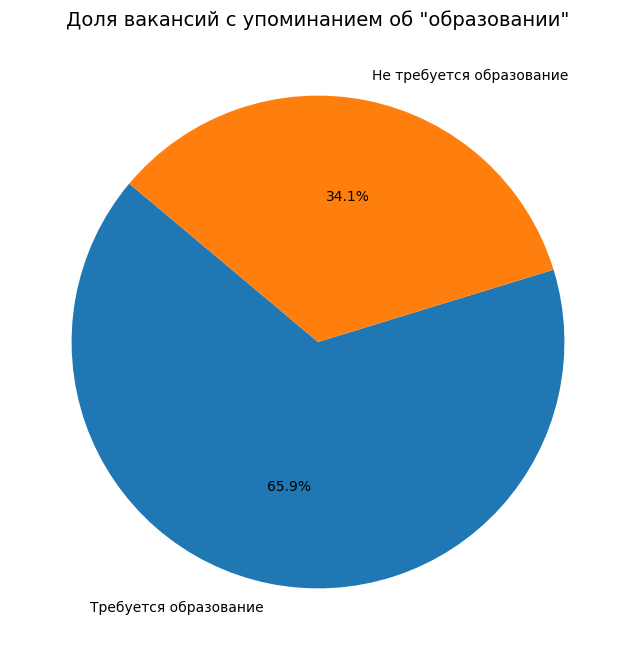

In [ ]:
# Расчет доли вакансий с упоминанием об "образовании"
education_counts = df_pr['education'].value_counts(normalize=True)

# Визуализация в виде круговой диаграммы
plt.figure(figsize=(8, 8))
education_counts.plot(kind='pie', labels=['Требуется образование', 'Не требуется образование'], autopct='%1.1f%%', startangle=140)
plt.title('Доля вакансий с упоминанием об "образовании"', fontsize=14)
plt.ylabel('')  # Убираем подпись оси
plt.show()

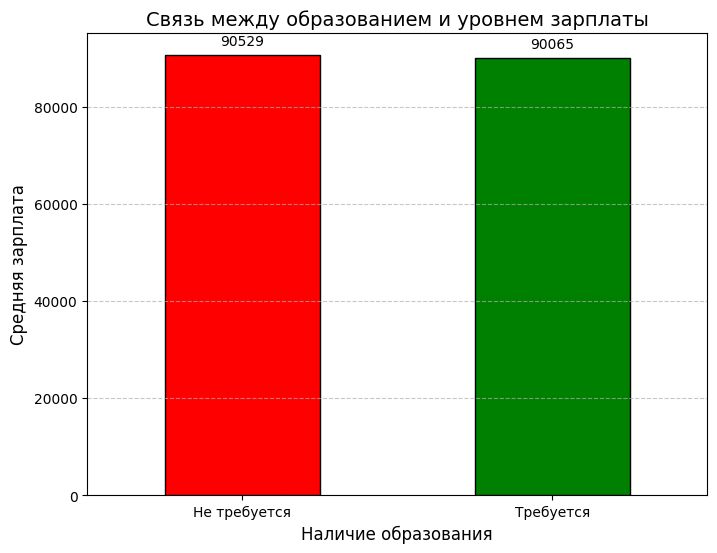

In [ ]:
# Группировка данных по наличию требования об "образовании" и расчет средней зарплаты
education_salary_relation = df_pr.groupby('education')['salary_mean'].mean()

# Визуализация связи между требованиями к образованию и уровнем зарплаты
plt.figure(figsize=(8, 6))
education_salary_relation.plot(kind='bar', color=['red', 'green'], edgecolor='k')
plt.title('Связь между образованием и уровнем зарплаты', fontsize=14)
plt.xlabel('Наличие образования', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Не требуется', 'Требуется'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений на столбцы
for i, value in enumerate(education_salary_relation.values):
    plt.text(i, value + 2000, f'{value:.0f}', ha='center', fontsize=10, color='black')

plt.show()

- Доля вакансий, где упоминается требование об образовании, составляет большинство (65.9%). Это говорит о том, что для большинства работодателей наличие образования играет важную роль при подборе кандидатов на позиции PR-менеджеров. Однако в 34.1% случаев образование не является обязательным условием.

- Средняя зарплата незначительно отличается в зависимости от требования к образованию.

## Комбинированный анализ
Исследуем пересечения между типом занятости, опытом работы, графиком, уровнем зарплаты, образованием и регионом. Построем тепловые карты и сводную таблицу для визуализации зависимостей.

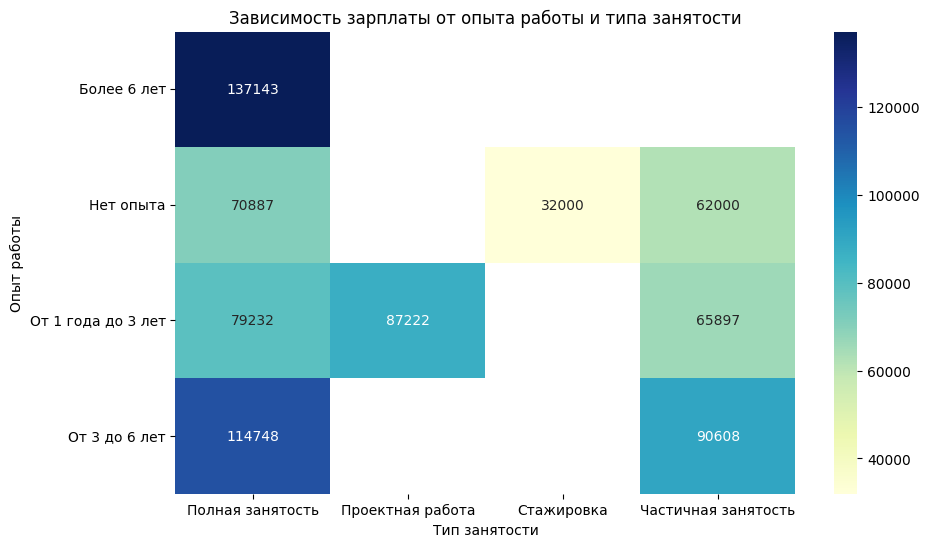

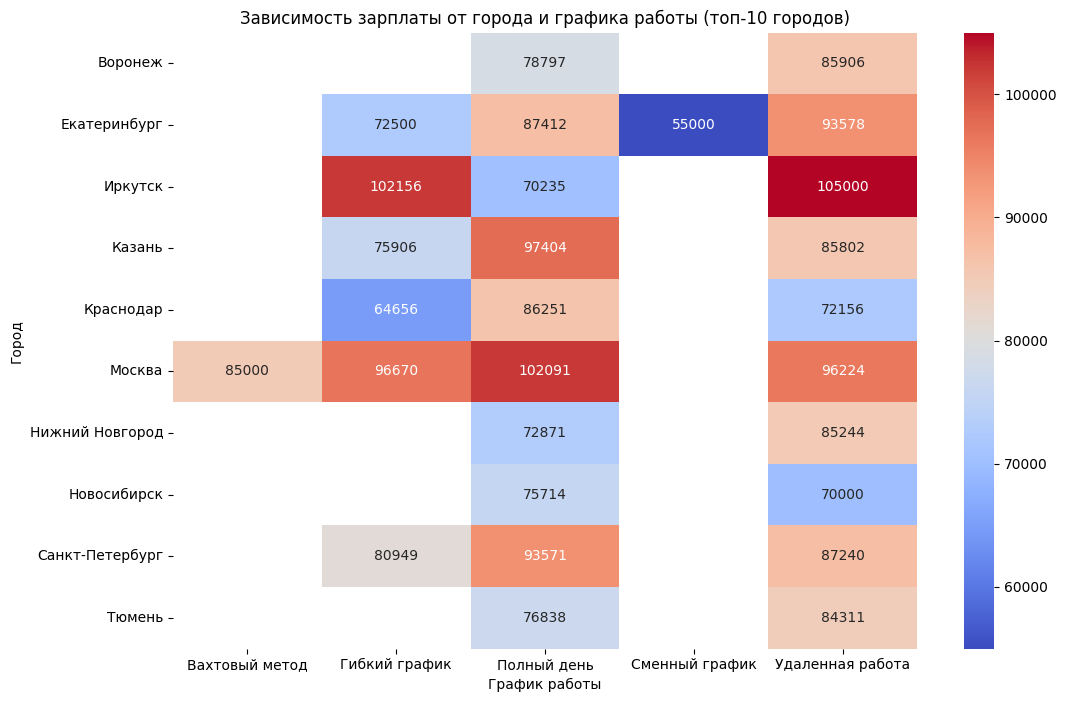

experience,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
education,,,,
False,136500.000000,69379.545455,78497.423669,115700.942350
True,138260.869565,68012.500000,79622.081448,111647.737069


In [ ]:
# Тепловая карта зависимости между опытом работы и типом занятости по средней зарплате
experience_employment_salary = df_pr.pivot_table(
    values='salary_mean',
    index='experience',
    columns='employment',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(experience_employment_salary, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title('Зависимость зарплаты от опыта работы и типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Опыт работы')
plt.show()

# Тепловая карта зависимости между городами (top_cities) и графиком работы по средней зарплате
city_schedule_salary = df_pr[df_pr['area'].isin(top_cities.index)].pivot_table(
    values='salary_mean',
    index='area',
    columns='schedule',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(city_schedule_salary, annot=True, fmt=".0f", cmap="coolwarm", cbar=True)
plt.title('Зависимость зарплаты от города и графика работы (топ-10 городов)')
plt.xlabel('График работы')
plt.ylabel('Город')
plt.show()

# Сводная таблица зависимости между образованием и опытом работы по средней зарплате
education_experience_salary = df_pr.pivot_table(
    values='salary_mean',
    index='education',
    columns='experience',
    aggfunc='mean'
)

education_experience_salary

По результатам анализа зависимости зарплат от различных факторов выявлено несколько важных тенденций:

1. **Связь между опытом работы и типом занятости**
  - Зарплата значительно увеличивается с ростом опыта работы. Например, сотрудники с опытом более 6 лет получают в среднем около 137143 рублей при полной занятости, что является самым высоким показателем.
  - Наиболее низкие зарплаты фиксируются на стажировках (32000 рублей) и частичной занятости для сотрудников без опыта (62000 рублей).
  - Полная занятость дает стабильно высокую зарплату во всех группах опыта, особенно для специалистов с опытом более 3 лет.
2. **Связь между городом и графиком работы**
  - Наиболее высокие зарплаты предлагаются в Москве для удаленной работы (102091 рублей) и полного дня (96670 рублей).
  - Иркутск выделяется высоким уровнем зарплат для удаленной работы (105000 рублей), что превышает показатели даже Москвы.
  - Наименьшая оплата наблюдается в Екатеринбурге для гибкого графика (55000 рублей), что может быть связано с меньшим спросом на такие вакансии в регионе.
  - Удаленная работа и полный день являются наиболее выгодными графиками в большинстве городов.
3. **Связь между уровнем образования и опытом работы**
  - Специалисты с образованием и опытом более 6 лет получают самые высокие зарплаты (138261 рублей).
  - Даже без требования к образованию специалисты с опытом более 6 лет имеют высокую оплату (136500 рублей), что говорит о важности опыта, независимо от образования.
  - Для начинающих сотрудников (без опыта) требование к образованию практически не влияет на зарплату — уровень оплаты составляет около 68000 рублей как для вакансий с требованием образования, так и без.

**Общие выводы:**

- На уровень зарплаты сильнее всего влияют опыт работы, город и тип занятости. Например, опытные сотрудники в крупных городах (Москва, Иркутск) и на удаленной работе получают максимальную оплату.
- Образование играет роль только для сотрудников с большим опытом. Для начинающих специалистов его влияние минимально.
- Полная занятость и удаленная работа являются наиболее выгодными типами занятости во всех группах опыта и городах.


# Вывод
На основании проведенного анализа данных вакансий на позицию PR-менеджера можно сделать следующие выводы:



## Уровень зарплат и опыт работы
- Самые высокие зарплаты получают специалисты с опытом более 6 лет, особенно при полной занятости.
- Вакансии для начинающих специалистов (без опыта) предлагают значительно меньший уровень оплаты.
- Средняя зарплата варьируется от 68000 рублей для кандидатов без опыта, и до 137000 рублей для опытных специалистов.

## Тип занятости и график работы
- Полная занятость обеспечивает наиболее высокий уровень зарплаты, в то время как стажировки и частичная занятость предлагают минимальные компенсации.
- Удаленная работа, особенно в Москве и Иркутске, ассоциируется с наиболее привлекательными условиями оплаты, тогда как гибкий график может предлагать меньший доход.

## География вакансий
- Наибольшее количество вакансий сосредоточено в Москве и Санкт-Петербурге. - Москва лидирует не только по числу вакансий, но и по уровню средней зарплаты (около 100873 рублей).
- В Казани и Санкт-Петербурге зарплаты также остаются сравнительно высокими, в то время как в Новосибирске и Нижнем Новгороде они являются наиболее низкими среди городов.

## Образование
- Требование об обязательном образовании присутствует в большинстве вакансий (около 66%). Однако уровень зарплаты лишь незначительно отличается для вакансий с требованием образования и без него.
- Для опытных специалистов наличие образования дает дополнительное преимущество в доходах, но его отсутствие не всегда критично влияет на уровень зарплаты.

## Работодатели
- Наиболее активные работодатели представлены как крупными компаниями, так и узкоспециализированными организациями. Это указывает на широкий спектр отраслей, заинтересованных в найме PR-специалистов.

## Итоговый вывод

Рынок труда для PR-менеджеров в России сосредоточен преимущественно в крупных городах, с доминированием Москвы, которая лидирует как по количеству вакансий, так и по уровню зарплат. Уровень зарплаты зависит от опыта работы, типа занятости и графика работы, а образование, хотя и важно, не всегда является решающим фактором. Компании готовы предлагать высокие зарплаты специалистам с уникальными навыками и опытом, даже при отсутствии у них образования.